In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

/opt/anaconda3/lib/python3.9/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(
Error processing line 1 of /opt/anaconda3/lib/python3.9/site-packages/distutils-precedence.pth:

  Traceback (most recent call last):
    File "/opt/anaconda3/lib/python3.9/site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored


In [2]:
F = len("Piotr")
L = len("Szyller")
N = (L+F)*100

In [4]:
model_1 = CmdStanModel(stan_file='code_1.stan')
result_1 = model_1.sample(data={'N':N})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)
chain 1 |██▋       | 00:01 Iteration: 400 / 1000 [ 40%]  (Sampling)




chain 1 |███▏      | 00:01 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:02 Iteration: 800 / 1000 [ 80%]  (Sampling)
chain 1 |█████     | 00:02 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                      
chain 2 |██████████| 00:02 Sampling completed

chain 3 |██████████| 00:02 Sampling completed


chain 4 |██████████| 00:02 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
result_1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.000,NaN,0.000000e+00,0.00,0.0000,0.00,NaN,NaN,NaN
theta,0.010,NaN,2.400000e-16,0.01,0.0100,0.01,NaN,NaN,NaN
y[1],0.160,0.030,1.900000e+00,-1.70,0.0510,1.80,3988.0,438.0,1.0
y[2],0.110,0.028,1.800000e+00,-1.70,0.0210,1.70,4014.0,441.0,1.0
y[3],0.140,0.032,2.000000e+00,-1.70,0.0095,1.70,3975.0,436.0,1.0
...,...,...,...,...,...,...,...,...,...
y[1196],0.072,0.025,1.600000e+00,-1.60,0.0110,1.60,4001.0,439.0,1.0
y[1197],0.076,0.025,1.600000e+00,-1.70,0.0045,1.70,4005.0,440.0,1.0
y[1198],0.100,0.028,1.800000e+00,-1.70,0.0096,1.70,4048.0,444.0,1.0


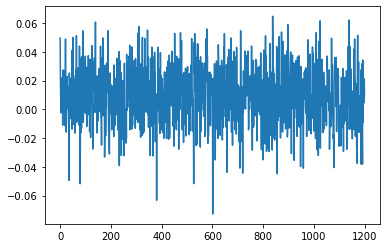

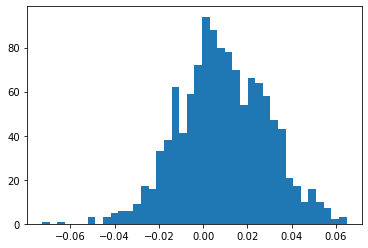

In [6]:
y1_median=np.percentile(result_1.stan_variable('y')[:,:],50,axis=0)
plt.plot(y1_median)
plt.show()
plt.hist(y1_median,bins=40)
plt.show()

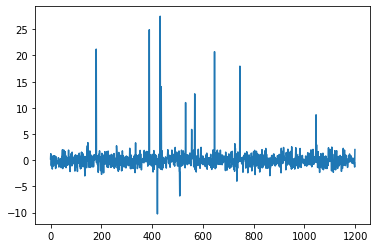

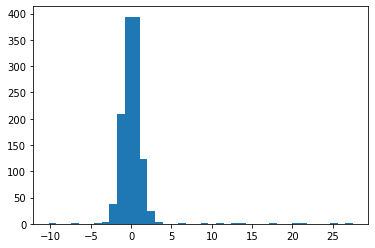

In [7]:
plt.plot(result_1.stan_variable('y')[0])
plt.show()
plt.hist(result_1.stan_variable('y')[0],bins=40)
plt.show()

In [8]:
model_2 = CmdStanModel(stan_file='code_2.stan')
data_2=dict(
    N=N
)
result_2 = model_2.sample(data=data_2, chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:01 Iteration:   1 / 1000 [  0%]  (Sampling)





chain 1 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)
chain 1 |█▊        | 00:02 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:03 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:04 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:05 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:06 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:06 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:07 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:08 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:09 Sampling completed                      
chain 2 |██████████| 00:09 Sampling completed

chain 3 |██████████| 00:08 Sampling completed
chain 4 


INFO:cmdstanpy:CmdStan done processing.


In [9]:
result_2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.00,0.0,0.000,0.0,NaN,NaN,NaN
"X[1,1]",-0.0130,0.017,1.00,-1.6,-0.023,1.6,3556.0,102.0,1.0
"X[1,2]",-0.0130,0.016,0.99,-1.6,-0.020,1.6,3781.0,109.0,1.0
"X[1,3]",0.0220,0.015,1.00,-1.6,0.029,1.6,4256.0,122.0,1.0
"X[2,1]",0.0029,0.016,1.00,-1.6,-0.027,1.7,3884.0,112.0,1.0
...,...,...,...,...,...,...,...,...,...
y[1196],-0.0290,0.041,2.50,-4.2,0.025,4.1,3903.0,112.0,1.0
y[1197],0.0160,0.041,2.60,-4.1,0.039,4.3,3947.0,113.0,1.0
y[1198],-0.0130,0.040,2.50,-4.1,-0.024,4.0,3977.0,114.0,1.0


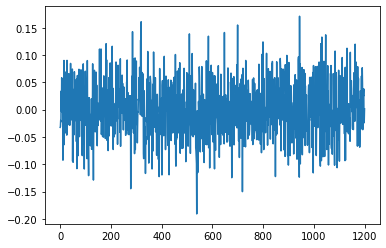

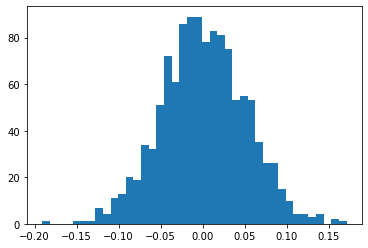

In [10]:
y2_median=np.percentile(result_2.stan_variable('y')[:,:],50,axis=0)
plt.plot(y2_median)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()

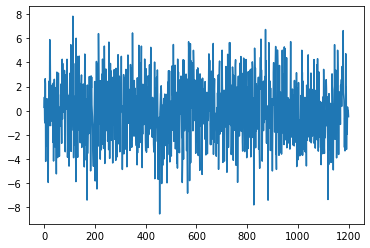

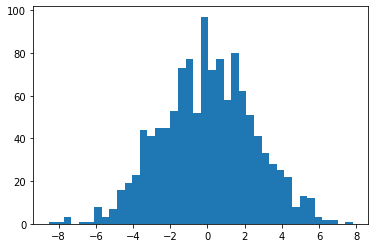

In [11]:
plt.plot(result_2.stan_variable('y')[100])
plt.show()
plt.hist(result_2.stan_variable('y')[100],bins=40)
plt.show()

In [12]:
model_3 = CmdStanModel(stan_file='code_3.stan')
data_3_1=dict(
    N=len(y1_median),
    y=y1_median,
)
data_3_2=dict(
    N=len(y2_median),
    y=y2_median,
)

INFO:cmdstanpy:found newer exe file, not recompiling


In [13]:
model_4 = CmdStanModel(stan_file='code_4.stan')
data_4_1=dict(
    N=len(y1_median),
    y=y1_median,
)
data_4_2=dict(
    N=len(y2_median),
    y=y2_median,
)

INFO:cmdstanpy:found newer exe file, not recompiling


In [14]:
result_3_1 = model_3.sample(data=data_3_1, chains = 4)
result_3_1.summary()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,3000.0000,0.029000,0.99000,3000.0000,3000.0000,3000.000,1200.0,56.0,1.0
sigma,0.0200,0.000015,0.00040,0.0190,0.0200,0.021,750.0,35.0,1.0
mu,0.0091,0.000009,0.00059,0.0081,0.0091,0.010,4300.0,200.0,1.0
log_lik[1],0.9400,0.002400,0.08600,0.8000,0.9400,1.100,1247.0,59.0,1.0
log_lik[2],2.8000,0.000550,0.02100,2.8000,2.8000,2.900,1494.0,70.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.0095,0.000330,0.02000,-0.0240,0.0096,0.043,3797.0,178.0,1.0
y_hat[1197],0.0090,0.000310,0.02000,-0.0250,0.0092,0.042,4261.0,200.0,1.0
y_hat[1198],0.0095,0.000310,0.02000,-0.0230,0.0097,0.043,4307.0,202.0,1.0


In [15]:
result_3_2 = model_3.sample(data=data_3_2, chains = 4)
result_3_2.summary()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |█████████▌| 00:03 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,1900.00000,0.025000,1.0000,1900.0000,1900.000000,1900.0000,1600.0,120.0,1.0
sigma,0.05000,0.000032,0.0010,0.0480,0.050000,0.0520,1000.0,77.0,1.0
mu,0.00120,0.000023,0.0014,-0.0012,0.001200,0.0036,4100.0,310.0,1.0
log_lik[1],1.80000,0.000440,0.0220,1.8000,1.800000,1.9000,2619.0,199.0,1.0
log_lik[2],1.90000,0.000460,0.0220,1.8000,1.900000,1.9000,2347.0,178.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.00082,0.000780,0.0490,-0.0790,-0.000180,0.0800,3843.0,292.0,1.0
y_hat[1197],0.00038,0.000770,0.0490,-0.0800,-0.000014,0.0830,4104.0,312.0,1.0
y_hat[1198],0.00120,0.000780,0.0500,-0.0800,0.000240,0.0840,4152.0,316.0,1.0


In [16]:
result_4_1 = model_4.sample(data=data_4_1, chains = 4)
result_4_1.summary()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)







chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:02 Iteration:  600 / 2000 [ 30%]  (Warmup)





chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:04 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,3000.0000,0.034000,1.30000,3000.0000,3000.0000,3000.000,1400.0,48.0,1.0
sigma,0.0190,0.000014,0.00047,0.0190,0.0190,0.020,1200.0,42.0,1.0
mu,0.0091,0.000008,0.00059,0.0081,0.0091,0.010,5200.0,180.0,1.0
nu,35.0000,0.410000,14.00000,18.0000,33.0000,63.000,1200.0,43.0,1.0
log_lik[1],0.9100,0.001900,0.08600,0.7600,0.9100,1.000,2169.0,76.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.0096,0.000330,0.02000,-0.0220,0.0095,0.042,3609.0,126.0,1.0
y_hat[1197],0.0099,0.000310,0.02000,-0.0230,0.0100,0.043,4167.0,145.0,1.0
y_hat[1198],0.0089,0.000310,0.02000,-0.0240,0.0087,0.042,4103.0,143.0,1.0


In [17]:
result_4_2 = model_4.sample(data=data_4_2, chains = 4)
result_4_2.summary()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)








chain 1 |█▊        | 00:01 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:04 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:06 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:07 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:08 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:09 It


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,1900.00000,0.028000,1.2000,1900.0000,1900.00000,1900.0000,1800.0,57.0,1.0
sigma,0.04800,0.000028,0.0012,0.0460,0.04800,0.0500,1800.0,55.0,1.0
mu,0.00120,0.000019,0.0014,-0.0012,0.00120,0.0035,5700.0,180.0,1.0
nu,32.00000,0.330000,13.0000,16.0000,29.00000,60.0000,1700.0,51.0,1.0
log_lik[1],1.90000,0.000370,0.0240,1.8000,1.90000,1.9000,4253.0,131.0,1.0
...,...,...,...,...,...,...,...,...,...
y_hat[1196],0.00150,0.000810,0.0510,-0.0820,0.00170,0.0860,3929.0,121.0,1.0
y_hat[1197],0.00090,0.000780,0.0500,-0.0820,0.00044,0.0830,4183.0,129.0,1.0
y_hat[1198],0.00110,0.000790,0.0500,-0.0810,0.00180,0.0820,4011.0,124.0,1.0


2.3 Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

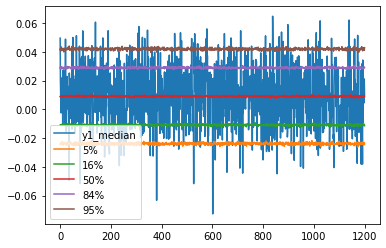

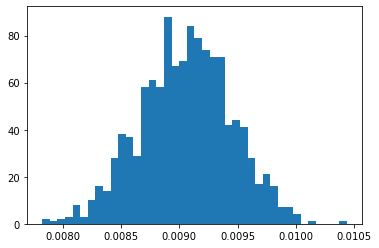

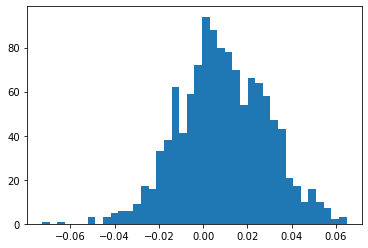

In [18]:
med_prob_ppc_3_1 = np.percentile(result_3_1.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_3_1
plt.plot(y1_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y1_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_3_1_median=np.percentile(result_3_1.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_3_1_median,bins=40)
plt.show()
plt.hist(y1_median,bins=40)
plt.show()

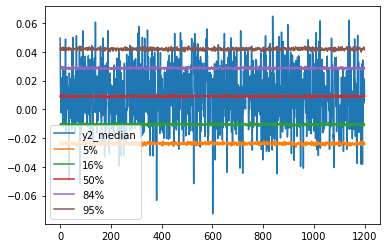

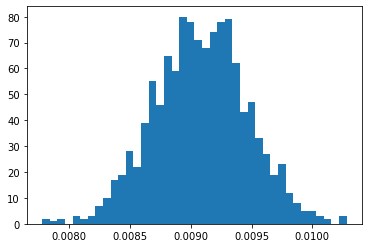

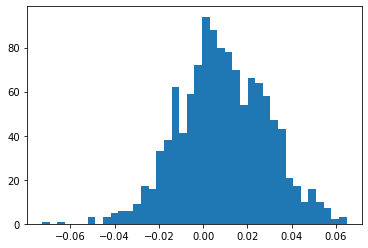

In [19]:
med_prob_ppc_4_1 = np.percentile(result_4_1.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_4_1
plt.plot(y1_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y2_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_4_1_median=np.percentile(result_4_1.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_4_1_median,bins=40)
plt.show()
plt.hist(y1_median,bins=40)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be

<AxesSubplot:xlabel='Log'>

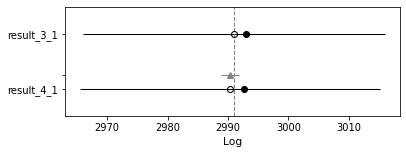

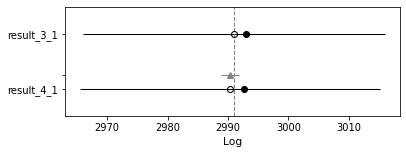

In [20]:
results_1 = {'result_3_1': result_3_1,'result_4_1': result_4_1}
comparisson_waic_1 = az.compare(results_1, ic = 'waic')
az.plot_compare(comparisson_waic_1)
comparisson_loo_1 = az.compare(results_1, ic = 'loo')
az.plot_compare(comparisson_loo_1)

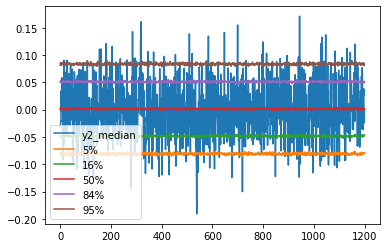

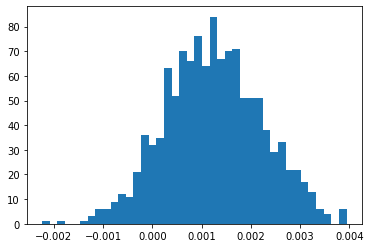

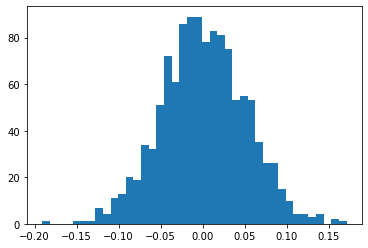

In [21]:
med_prob_ppc_3_2 = np.percentile(result_3_2.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_3_2
plt.plot(y2_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y2_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_3_2_median=np.percentile(result_3_2.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_3_2_median,bins=40)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()

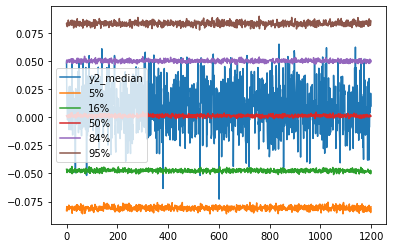

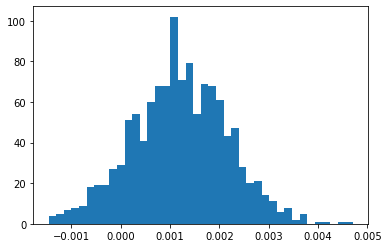

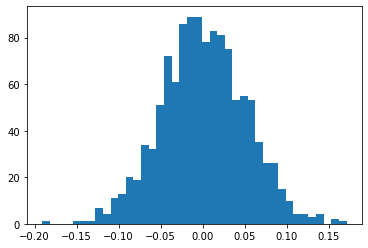

In [22]:
med_prob_ppc_4_2 = np.percentile(result_4_2.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_4_2
plt.plot(y1_median)
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[2])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
labels= [ "y2_median", "5%", "16%", "50%", "84%", "95%"]
plt.legend(labels)
plt.show()

y_hat_4_2_median=np.percentile(result_4_2.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_4_2_median,bins=40)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
/opt/anaconda3/lib/python3.9/site-packages/arviz/stats/stats.py:248: FutureWarning: The frame.append method is deprecated and will be

<AxesSubplot:xlabel='Log'>

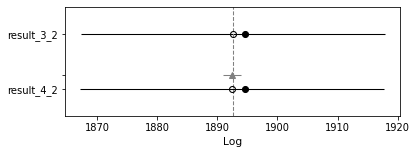

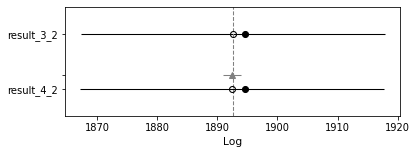

In [23]:
results_2 = {'result_3_2': result_3_2,'result_4_2': result_4_2}
comparisson_waic_2 = az.compare(results_2, ic = 'waic')
az.plot_compare(comparisson_waic_2)
comparisson_loo_2 = az.compare(results_2, ic = 'loo')
az.plot_compare(comparisson_loo_2)

In [24]:
x2_median_1_3=np.percentile(result_2.stan_variable('X')[:,:],50,axis=0)
x2_median_0=np.percentile(result_2.stan_variable('X')[:,:,0],50,axis=0)
x2_median_1=np.percentile(result_2.stan_variable('X')[:,:,1],50,axis=0)
x2_median_2=np.percentile(result_2.stan_variable('X')[:,:,2],50,axis=0)
x2_median_K1=x2_median_1_3[:,0:1]
x2_median_K2=x2_median_1_3[:,0:2]
x2_median_K3=x2_median_1_3[:,0:3]

In [25]:
model_5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L07/code_5.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L07/code_5
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L07/code_5.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L07/code_5.stan
Semantic error in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L07/code_5.stan', line 27, column 14 to column 15:
   -------------------------------------------------
    25:     array [N] real y_hat;
    26:     for (i in 1:N) {
    27:        log_lik[j] = normal_lpdf(y[j] | mu[j], sigma);
                       ^
    28:        y_hat[j] = normal_rng(mu[j],sigma);
    29:     }
   -------------------------------------------------

Identifier 'j' not in scope.
make: *** [make/program:50: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L07/code_5.hpp] 

ValueError: Unable to compile Stan model file: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L07/code_5.stan.

In [ ]:
data_5_K1=dict(
    N=N,
    K=1,
    y=y2_median,
    X=x2_median_K1
)
result_5_K1 = model_5.sample(data=data_5_K1, chains = 4)

In [ ]:
data_5_K2=dict(
    N=N,
    K=2,
    y=y2_median,
    X=x2_median_K2
)
result_5_K2 = model_5.sample(data=data_5_K2, chains = 4)

In [ ]:
data_5_K3=dict(
    N=N,
    K=3,
    y=y2_median,
    X=x2_median_K3
)
result_5_K3 = model_5.sample(data=data_5_K3, chains = 4)

compare models for predictors 1,2 and 3

In [ ]:
results_5 = {'result_5_K1': result_5_K1,'result_5_K3': result_5_K3,'result_5_K2': result_5_K2}
comparisson_waic_5 = az.compare(results_5, ic = 'waic')
az.plot_compare(comparisson_waic_5)
comparisson_loo_5 = az.compare(results_5, ic = 'loo')
az.plot_compare(comparisson_loo_5)

In [ ]:
result_5_K3.summary()

In [ ]:
med_prob_ppc_5_2 = np.percentile(result_5_K3.stan_variable('y_hat'),[5,16,50,84,95],axis=0)
med_prob_ppc = med_prob_ppc_5_2
plt.plot(med_prob_ppc[0])
plt.plot(med_prob_ppc[1])
plt.plot(med_prob_ppc[3])
plt.plot(med_prob_ppc[4])
plt.plot(med_prob_ppc[2])
plt.plot(y2_median)
labels= [ "5%", "16%","84%","95%","50%","y2_median"]
plt.legend(labels)
plt.show()

y_hat_5_2_median=np.percentile(result_5_K3.stan_variable('y_hat')[:,:],50,axis=0)
plt.hist(y_hat_5_2_median,bins=40)
plt.show()
plt.hist(y2_median,bins=40)
plt.show()



err=y_hat_5_2_median-y2_median
plt.plot(err)
plt.show()
plt.hist(err,bins=40)
plt.show()